
# ML-Workshop
## Data Exploration & House price prediction
Dataset: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## Load the data from .csv

In [9]:
import pandas as pd
import missingno
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)

# | remove max column restriction for printing DataFrames (default=20)
pd.options.display.max_columns = None 

path = './data/house_prices.csv'

df = pd.read_csv(path)

df =df.drop('Id', axis=1)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Missing values (NaN)

### Find NaN values 

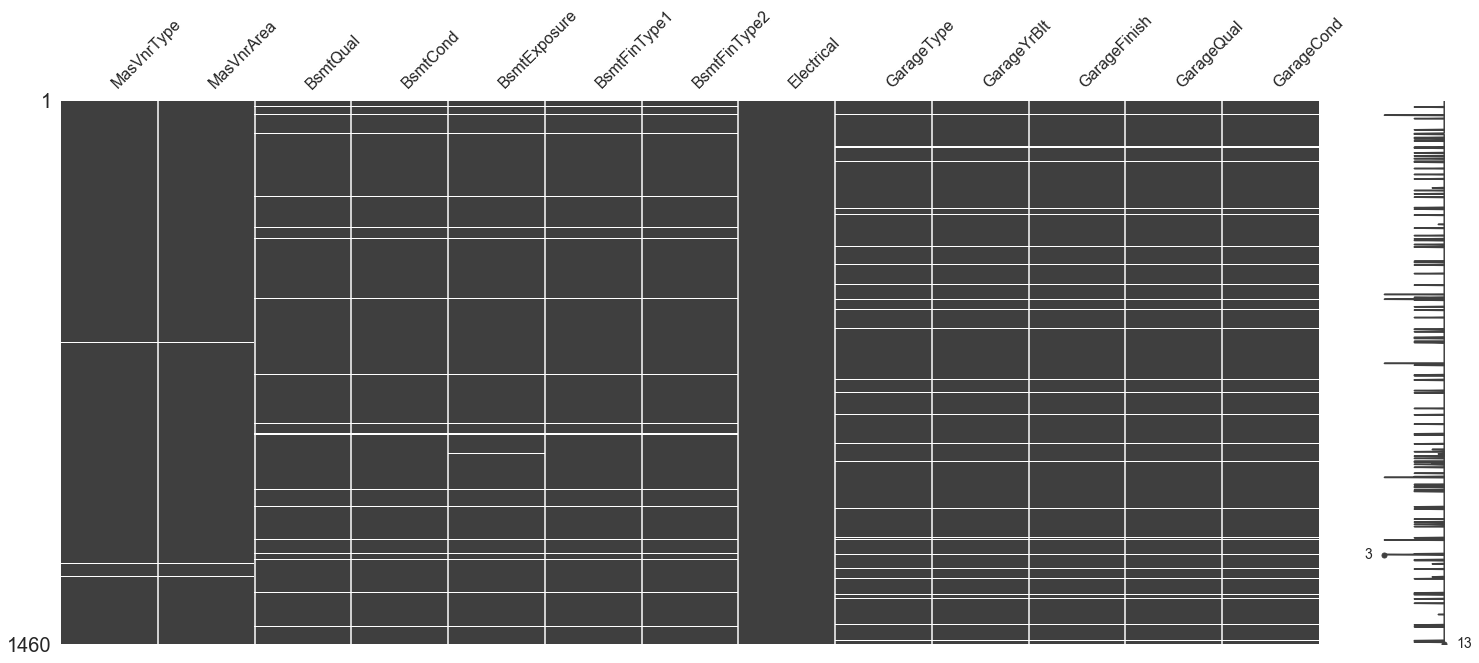

In [31]:
# | get names of columns where values are missing
count = df.count()
missing_column = count[count < len(df)].index

# | plot missing values only of columns where values are missing

missingno.matrix(df.loc[:,missing_column])


### Remove/Replace the NaN Values

In [38]:
# | drop all columns where more than 90% of the values are N/A
df = df.dropna(axis=1, thresh=int(0.9*df.shape[0]))


# | check how many of the remaining rows have at least one NaN value
print((len(df) - len(df.dropna()))*100/len(df))
df = df.dropna()


0.0


Now we have two options: <br>
- A: remove all rows that have at least one missing value
- B: replace the Nan values e.g. by the mean (for numerical) or the most frequent value (for categorical) of the corresponding column

In [5]:
# | A: remove all rows that have at least one missing value

# | B: replace the Nan values by the mean (for numerical) or the most frequent value (for categorical)

df_num
df_cat
df_num.fillna(df.mean())
df_cat.fillna(df.mode())

### Calculate statistics such as mean, std & percentiles

In [39]:
# | note: df.describe() ignores the non-numerical columns
df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.00000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,56.136024,10706.294469,6.219731,5.596413,1973.029148,1985.668909,110.360239,464.234679,49.218236,582.494768,1095.947683,1176.221973,357.141256,4.221973,1537.585202,0.438714,0.060538,1.575486,0.402840,2.864723,1.029895,6.550075,0.648729,1978.596413,1.87145,501.449925,99.384903,47.782511,21.263827,3.585949,16.43423,3.010463,42.932735,6.331839,2007.805680,186761.782511
std,41.252576,10336.621126,1.324472,1.078124,29.563540,20.296463,185.604816,458.792420,166.196584,439.950528,405.554435,386.644986,440.324982,40.712916,520.579960,0.515630,0.241685,0.547570,0.504185,0.776677,0.174697,1.585071,0.645393,24.773741,0.63428,186.761863,127.537065,65.362562,60.843964,30.224622,58.05159,41.961337,508.056255,2.699437,1.330691,78913.847668
min,20.000000,1300.000000,2.000000,2.000000,1880.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,105.000000,438.000000,0.000000,0.000000,438.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,0.000000,1900.000000,1.00000,160.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,2006.000000,35311.000000
25%,20.000000,7744.000000,5.000000,5.000000,1956.000000,1968.000000,0.000000,0.000000,0.000000,248.000000,819.750000,894.000000,0.000000,0.000000,1160.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.00000,377.500000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,5.000000,2007.000000,135000.000000
50%,50.000000,9600.000000,6.000000,5.000000,1976.000000,1994.500000,0.000000,413.000000,0.000000,489.000000,1021.500000,1098.000000,0.000000,0.000000,1480.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.00000,484.000000,6.000000,28.000000,0.000000,0.000000,0.00000,0.000000,0.000000,6.000000,2008.000000,168500.000000
75%,70.000000,11760.750000,7.000000,6.000000,2001.000000,2004.000000,174.000000,733.000000,0.000000,815.750000,1324.000000,1414.000000,740.500000,0.000000,1791.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.00000,583.000000,174.500000,70.000000,0.000000,0.000000,0.00000,0.000000,0.000000,8.000000,2009.000000,220000.000000
max,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,2.000000,2.000000,3.000000,2.000000,6.000000,3.000000,12.000000,3.000000,2010.000000,4.00000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.00000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Separate categorical and numerical columns 

Nominal and numerical values cannot be analysed in the same way ...

In [45]:
# | check how many categorical columns we have
df.dtypes.value_counts()




In [8]:
# | separate categorical and numerical columns for further analysis
df_cat = df.select_dtypes(include="object")
df_num = df.select_dtypes(exclude="object")

## Analyse distributions

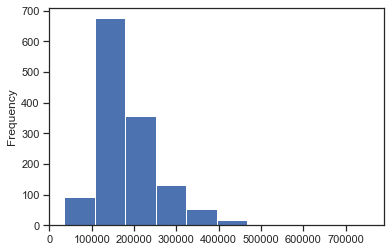

In [47]:
# | plot distribution/histogram for target column SalePrice
df_num['SalePrice'].plot.hist()

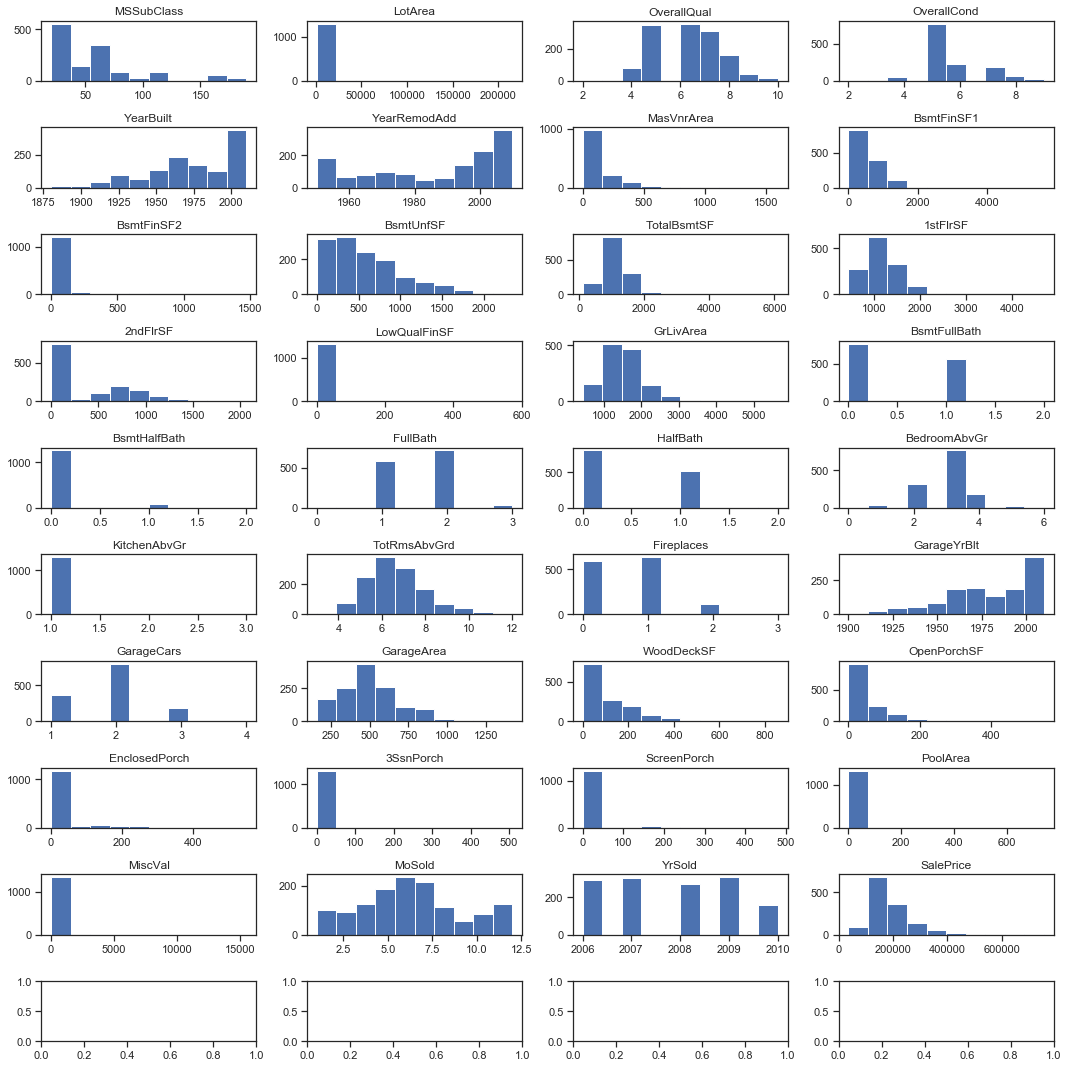

In [58]:
# | plot distributions for all columns

fig, axs = plt.subplots(round(len(df_num.columns)/4)+1, 4, figsize=(15,15))

for index, column in enumerate(df_num.columns):
    fig.axes[index].hist(df_num[column])
    fig.axes[index].set_title(column)
    
plt.tight_layout()

In [11]:
# | look at outliers for column LotArea


## Correlation analysis of numerical features

### Correlation between features and target 

In [12]:
# | get highest correlations between features and target variable 'SalePrice'


Now lets look more in detail at the relationship of the most correlating feature to the target


In [13]:
# | scatter plot of highest correlating column with SalePrice


In [14]:
# | scatter plot of top-10 correlating column with SalePrice


Let's have a look at the remaining features, with lower correlations:

### Correlation between features

Find features holding redundant information

In [3]:
# | plot correlation matrix 


## Analysis of categorical features

Note that we cannot apply the same analysis to the categorical columns, as correlation and mutual information are only defined for numerical values.

### Visualize frequencies/distribution of the nominal values

### Analyse relation between categorical features and target variable

Boxplots are a nice way to visialize the "correlation" between the classes of categorical features and the target variable

## Machine Learning - House Price Prediction with Regression

In [ ]:
# | convert categorical features to numbers


In [ ]:
# | concatenate categorical and numerical features

# | define x,y


In [ ]:
from sklearn.model_selection import train_test_split
# | split data into train and test sets


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# | define and train model


In [ ]:
# | plot prediction v.s. ground truth